In [2]:
import numpy as np
import pandas as pd
import scipy.spatial as spatial
import matplotlib.pyplot as plt
import matplotlib.path as path
import matplotlib as mpl
import smopy


import geopandas as gpd

In [8]:
dd = gpd.read_file('../../mapas_brasil/secoes_eleitorais_voronois/secoes_eleitorais_voronois.shp')

In [13]:
mask = dd['UF']=='SP'
sp = dd[mask]

In [16]:
sp.head()

,CD_GEOCMU,CEP,ENDERECO,LOCAL_VOTA,MultiPolyg,NM_MUNICIP,NUM_SECAO,UF,ZONA,lat,lon,geometry
925,3552205,18035110,"RUA PROFESSOR TOLEDO, 77.",EE ANTÔNIO PADILHA,0.0,Sorocaba,1,SP,137,-23.5023,-47.4622,"POLYGON ((-47.46480 -23.49997, -47.46433 -23.4..."
926,3552205,18035490,"RUA DOUTOR ARTHUR GOMES, 51.",INSTITUTO DE EDUCAÇÃO CIÊNCIAS E LETRAS,0.0,Sorocaba,9,SP,137,-23.5034,-47.4637,"POLYGON ((-47.46585 -23.50628, -47.46748 -23.5..."
927,3552205,18010320,"RUA SOUZA PEREIRA, 188.",EE VISCONDE DE PORTO SEGURO,0.0,Sorocaba,18,SP,137,-23.4996,-47.4536,"POLYGON ((-47.44689 -23.49538, -47.44820 -23.4..."
928,3552205,18040610,"RUA SYLVIO ROMERO, 242.",EE DOUTOR ARQUIMÍNIO MARQUES DA SILVA,0.0,Sorocaba,26,SP,137,-23.5090,-47.4635,"POLYGON ((-47.46635 -23.51357, -47.46641 -23.5..."
929,3552205,18040323,"RUA GUSTAVO TEIXEIRA, 411.",COLÉGIO SALESIANO SÃO JOSÉ,0.0,Sorocaba,34,SP,137,-23.5086,-47.4686,"POLYGON ((-47.47383 -23.50669, -47.47381 -23.5..."


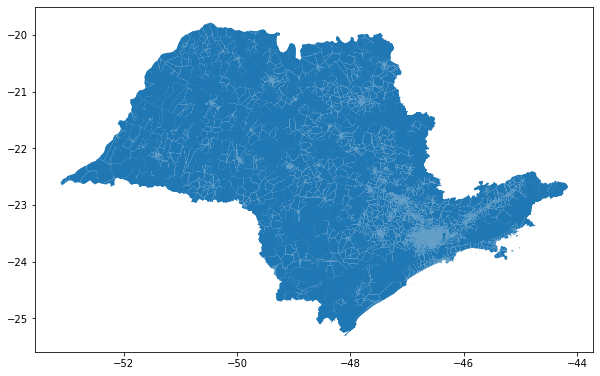

In [15]:
# plt.figure()
sp.plot(figsize=(10,10))

In [20]:
df = pd.read_csv('../../dados_eleitorais/boletim_urna/bweb_1t_SP_101020182030.csv', encoding='latin1', error_bad_lines=False)

b'Skipping line 1122919: expected 1 fields, saw 2\nSkipping line 1126629: expected 1 fields, saw 2\nSkipping line 1130773: expected 1 fields, saw 2\nSkipping line 1132038: expected 1 fields, saw 2\nSkipping line 1133586: expected 1 fields, saw 2\nSkipping line 1134116: expected 1 fields, saw 2\nSkipping line 1136694: expected 1 fields, saw 2\nSkipping line 1137307: expected 1 fields, saw 2\nSkipping line 1138844: expected 1 fields, saw 2\nSkipping line 1138975: expected 1 fields, saw 2\nSkipping line 1139577: expected 1 fields, saw 2\nSkipping line 1139769: expected 1 fields, saw 2\nSkipping line 1141465: expected 1 fields, saw 2\nSkipping line 1143231: expected 1 fields, saw 2\nSkipping line 1146748: expected 1 fields, saw 2\nSkipping line 1155757: expected 1 fields, saw 2\nSkipping line 1156061: expected 1 fields, saw 2\nSkipping line 1156321: expected 1 fields, saw 2\nSkipping line 1156618: expected 1 fields, saw 2\nSkipping line 1159679: expected 1 fields, saw 2\nSkipping line 1160

In [21]:
df.head()

,"DT_GERACAO;""HH_GERACAO"";""ANO_ELEICAO"";""CD_PLEITO"";""DT_PLEITO"";""NR_TURNO"";""CD_ELEICAO"";""DS_ELEICAO"";""DT_ELEICAO"";""SG_ UF"";""CD_MUNICIPIO"";""NM_MUNICIPIO"";""NR_ZONA"";""NR_SECAO"";""NR_LOCAL_VOTACAO"";""CD_CARGO_PERGUNTA"";""DS_CARGO_PERGUNTA"";""NR_PARTIDO"";""SG_PARTIDO"";""NM_PARTIDO"";""QT_APTOS"";""QT_COMPARECIMENTO"";""QT_ABSTENCOES"";""CD_TIPO_URNA"";""DS_TIPO_URNA"";""CD_TIPO_VOTAVEL"";""DS_TIPO_VOTAVEL"";""NR_VOTAVEL"";""NM_VOTAVEL"";""QT_VOTOS"";""NR_URNA_EFETIVADA"";""CD_CARGA_1_URNA_EFETIVADA"";""CD_CARGA_2_URNA_EFETIVADA"";""CD_FLASCARD_URNA_EFETIVADA"";""DT_CARGA_URNA_EFETIVADA"";""DS_CARGO_PERGUNTA_SECAO"";""DS_AGREGADAS"";""DT_ABERTURA"";""DT_ENCERRAMENTO"";""QT_ELEITORES_BIOMETRIA_NH"";""NR_JUNTA_APURADORA"";""NR_TURMA_APURADORA"""
0,"10/10/2018;""20:30:59"";""2018"";""228"";""07/10/2018..."
1,"10/10/2018;""20:30:59"";""2018"";""228"";""07/10/2018..."
2,"10/10/2018;""20:30:59"";""2018"";""228"";""07/10/2018..."
3,"10/10/2018;""20:30:59"";""2018"";""228"";""07/10/2018..."
4,"10/10/2018;""20:30:59"";""2018"";""228"";""07/10/2018..."
